# TaylorF2EccPerAdvFD1PN injection and parameters recovered with TaylorF2EccPerAdvFD
## minimum-frequency=20Hz
## injected-parameters:
### chirp_mass = 8.264298149225912, mass_ratio = 0.819047619047619
### SNR = 41.62079657160877
### injection_parameters = dict(mass_1=10.5, mass_2=8.6, eccentricity=0.08, luminosity_distance=280., theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

#### 01:35 bilby INFO    : Sampling time: 12:15:36.068104
#### 01:35 bilby INFO    : Summary of results:
#### nsamples: 9967
#### ln_noise_evidence: -8227.368
#### ln_evidence: -7557.561 +/-  0.243
#### ln_bayes_factor: 669.807 +/-  0.243

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import bilby

In [6]:
result = bilby.result.read_in_result("TaylorF2EccPerAdvFD_recovery_result.json")

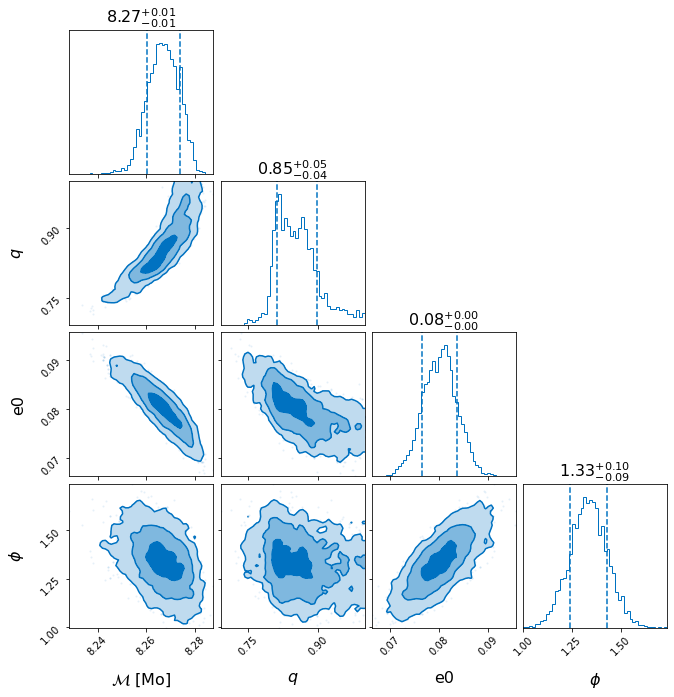

In [7]:
result.plot_corner(outdir='.')

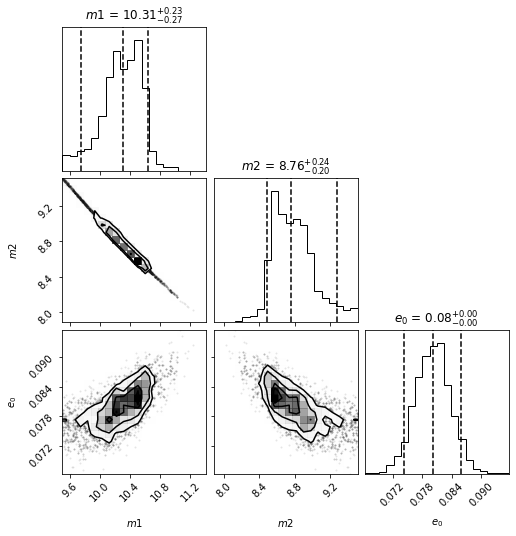

In [8]:
chirp_mass_ = result.posterior["chirp_mass"].values
mass_ratio_ =  result.posterior["mass_ratio"].values
e0 = result.posterior["eccentricity"].values

m1 = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
m2 = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)

data = np.transpose(np.array([m1, m2,e0]))
figure = corner.corner(data, labels=[r"$m1$", r"$m2$", r"$e_0$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [ ]:
'''
import numpy as np
import bilby

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

outdir = 'outdir_TaylorF2EccPerAdvFD_recovery'
label = 'TaylorF2EccPerAdvFD_recovery'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

time_of_event = 1126259642.413
post_trigger_duration = 1.0
duration = 16.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 512.

# frequency_array, mass_1, mass_2, luminosity_distance, a_1, a_2, theta_jn, phase
# chirp_mass = 8.264298149225912, mass_ratio = 0.819047619047619
injection_parameters = dict(
    mass_1=10.5, mass_2=8.6, eccentricity=0.08, luminosity_distance=280.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='TaylorF2EccPerAdvFD',
                          reference_frequency=20., minimum_frequency=20., catch_waveform_errors=True)

waveform_arguments2 = dict(waveform_approximant='TaylorF2EccPerAdvFD1PNAmp',
                          reference_frequency=20., minimum_frequency=20., catch_waveform_errors=True)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_TaylorF2EccPerAdvFD,
    waveform_arguments=waveform_arguments)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmp,
    waveform_arguments=waveform_arguments2)

minimum_frequency = 20.
maximum_frequency = 256.

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters)

prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.gw.prior.Uniform(name='chirp_mass', minimum=5.223303379776745, maximum=10.446606759553488, unit='Mo')
prior['mass_ratio'] = bilby.gw.prior.Uniform(name='mass_ratio', minimum=0.5, maximum=1.0)
prior['eccentricity'] = bilby.gw.prior.Uniform(name='e0', minimum=0.0, maximum=0.1)
prior["luminosity_distance"] = 280.
prior["theta_jn"] = 0.4
prior["psi"] = 2.659
prior["phase"] = bilby.gw.prior.Uniform(name='phase', minimum=0.0, maximum=3.14)
prior["geocent_time"] = 1126259642.413
prior["ra"] = 1.375
prior["dec"] = -1.2108

likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator, priors=prior)

result_short = bilby.core.sampler.run_sampler(
    likelihood, prior, sampler='dynesty', outdir=outdir, label=label,
    nlive=500, dlogz=0.1, npool=8 )
'''

In [10]:
40.7-2.36

38.34